### Question 2

A team of plantation planners are concerned about the yield of oil palm trees, which seems to
fluctuate. They have collected a set of data and needed help in analysing on how external
factors influence fresh fruit bunch (FFB) yield. Some experts are of opinion that the flowering of
oil palm tree determines the FFB yield, and are linked to the external factors. Perform the
analysis, which requires some study on the background of oil palm tree physiology.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('./palm_ffb.csv')
df['Date'] = pd.to_datetime(df['Date'])

In [4]:
df.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield
0,01.01.2008,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62
1,01.02.2008,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45
2,01.03.2008,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56
3,01.04.2008,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39
4,01.05.2008,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44


In [8]:
#Feature Engineering, create a new feature, Year from Date feature
df['Year'] = df['Date'].dt.year

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year
0,2008-01-01,616.4,25.306452,21.3,32.2,184.4,25,777778.3951,1.62,2008
1,2008-01-02,568.9,26.165517,20.9,35.1,140.2,23,767988.2759,1.45,2008
2,2008-01-03,577.6,25.448387,21.3,32.9,280.4,25,783951.9231,1.56,2008
3,2008-01-04,581.1,26.903333,20.6,34.8,173.3,25,788987.0504,1.39,2008
4,2008-01-05,545.4,27.241935,20.9,35.0,140.6,25,813659.7222,1.44,2008


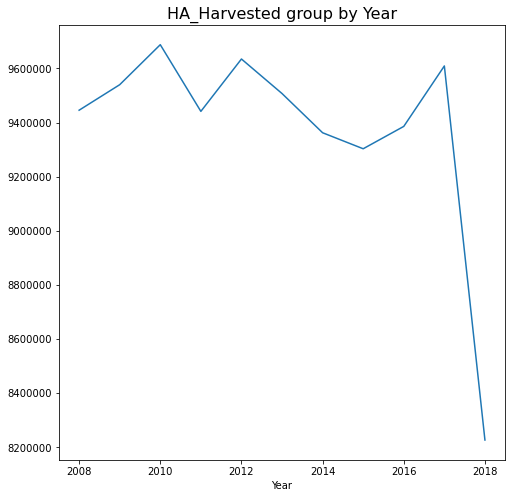

In [25]:
plt.figure(figsize = (8,8))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('HA_Harvested group by Year', fontsize = 16)

df.groupby('Year').HA_Harvested.sum().plot()
plt.show()

<strong>Observation</strong><br>
A quick check about the number of HA_Harvested group by year.<br>
It seems up and down from 2008 to 2012. But there's decreasing trend from 2012 to 2015. <br>
The number of HA_Harvested is getting back to the peak of 2012 at year 2017. <br>
Unfortunately, something bad is happen and make dramastic fall down at 2018. <br>

### Use Case 1

* gain the deeper insight of year 2018 data

In [26]:
df_2018 = df[df['Year'] == 2018]
df_2018

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year
120,2018-01-01,613.9,25.716129,19.8,33.0,422.1,26,809692.0904,1.77,2018
121,2018-01-02,549.7,26.646429,20.5,34.2,60.2,22,791064.0288,1.39,2018
122,2018-01-03,479.9,27.080645,21.4,34.8,108.0,26,824104.5752,1.53,2018
123,2018-01-04,473.4,27.533333,21.5,34.6,176.4,25,834390.3448,1.45,2018
124,2018-01-05,491.7,27.561290,21.9,34.3,179.4,23,870965.4676,1.39,2018
125,2018-01-06,498.2,27.213333,21.6,33.6,165.6,24,820758.9147,1.29,2018
126,2018-01-07,494.7,27.074194,21.2,33.5,154.7,26,882254.2254,1.42,2018
127,2018-01-08,478.8,27.016129,20.4,33.6,127.2,25,829488.8199,1.61,2018
128,2018-01-09,481.1,26.946667,21.0,34.2,180.6,23,792101.0471,1.91,2018
129,2018-01-10,510.8,26.819355,21.0,34.4,207.0,26,771805.3922,2.04,2018


<strong>Observation</strong><br>
Unfortunately we have the incompleted data for year 2018 as it contains only 10 months data.

### Use Case 2

* Perform the analysis for the data between 2012 and 2015

There are few perspective we can perform analysis to find out the root cause.<br>
1. Is the temperature increase within the years?
2. Because of less precipitation, so the soilmoisture affect the HA_Harvested?


In [27]:
df_2012_2015 = df[(df['Year'] >= 2012) & (df['Year'] <= 2015)]

In [30]:
df_2012_2015.head()

,Date,SoilMoisture,Average_Temp,Min_Temp,Max_Temp,Precipitation,Working_days,HA_Harvested,FFB_Yield,Year
48,2012-01-01,602.1,26.112903,21.1,33.5,134.9,24,776784.9206,1.26,2012
49,2012-01-02,547.2,26.372414,20.8,34.1,129.1,24,829962.3853,1.09,2012
50,2012-01-03,539.9,26.558065,21.6,33.0,208.9,27,834886.6071,1.12,2012
51,2012-01-04,566.8,26.890000,20.8,33.3,249.4,24,854254.5455,1.21,2012
52,2012-01-05,593.7,27.525806,21.8,34.6,276.7,25,862724.6269,1.34,2012


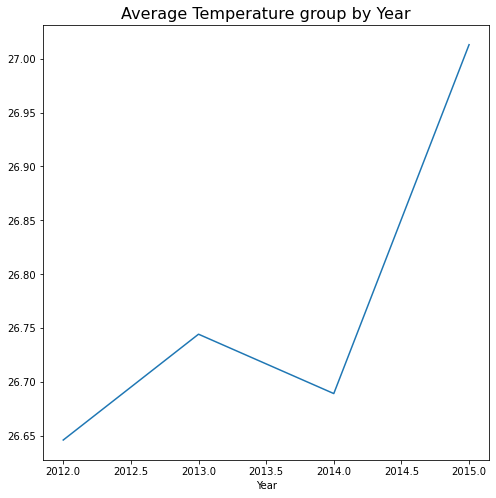

In [34]:
plt.figure(figsize = (8,8))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Average Temperature group by Year', fontsize = 16)

df_2012_2015.groupby('Year').Average_Temp.mean().plot()
plt.show()

<strong>Observation</strong><br>
The temperature is getting increase from 2012 to 2015. <br>
We can assume that the temperature is critical for the HA_Harvested & FFB_Yield. <br>


<AxesSubplot:title={'center':'Average SoilMoisture group by Year'}, xlabel='Year'>

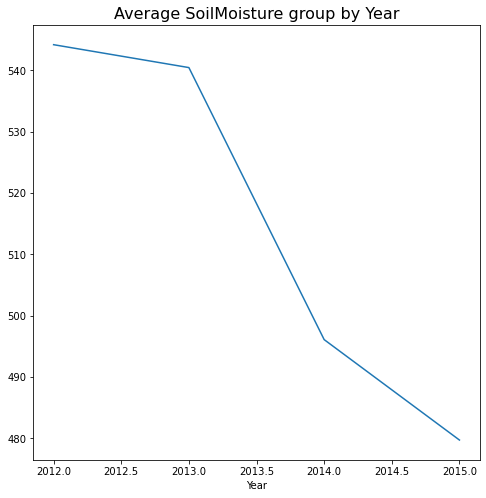

In [46]:
plt.figure(figsize = (8,8))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Average SoilMoisture group by Year', fontsize = 16)

df_2012_2015.groupby('Year').SoilMoisture.mean().plot()

<AxesSubplot:title={'center':'Average Precipitation group by Year'}, xlabel='Year'>

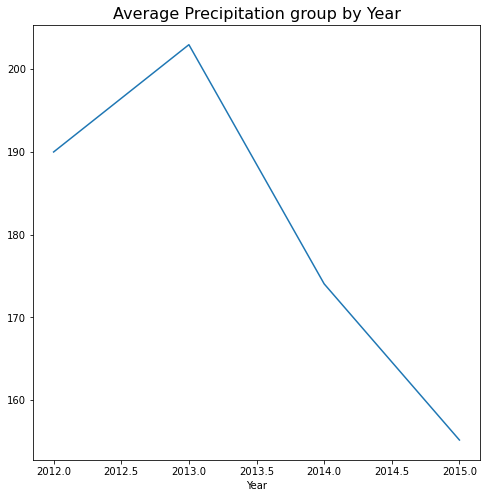

In [48]:
plt.figure(figsize = (8,8))
plt.ticklabel_format(useOffset=False, style='plain')
plt.title('Average Precipitation group by Year', fontsize = 16)

df_2012_2015.groupby('Year').Precipitation.mean().plot()

<strong>Observation</strong><br>
It's very obvious that precipitation & SoilMoisture are affect by temperature. <br>
The higher temperature, the lesser precipitation. <br>
And it causes the HA_Harvested are getting less.